In [1]:
!pip install youtube_transcript_api

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
from IPython.display import YouTubeVideo

In [4]:
video=input("Enter the link of your YouTube Video: ")

In [5]:
id_video=video.split("=")[1]
print(id_video)

2W85Dwxx218


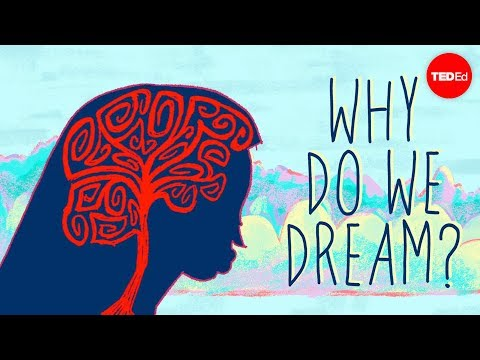

In [6]:
YouTubeVideo(id_video)

In [7]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [8]:
transcript

[{'text': 'In the third millenium BCE,', 'start': 6.643, 'duration': 1.769},
 {'text': 'Mesopotamian kings recorded and\ninterpreted their dreams on wax tablets.',
  'start': 8.412,
  'duration': 5.394},
 {'text': 'A thousand years later,', 'start': 13.806, 'duration': 1.34},
 {'text': 'Ancient Egyptians wrote a dream book',
  'start': 15.146,
  'duration': 2.102},
 {'text': 'listing over a hundred common dreams\nand their meanings.',
  'start': 17.248,
  'duration': 3.406},
 {'text': 'And in the years since,', 'start': 20.654, 'duration': 1.209},
 {'text': "we haven't paused in our quest\nto understand why we dream.",
  'start': 21.863,
  'duration': 3.787},
 {'text': 'So, after a great deal\nof scientific research,',
  'start': 25.65,
  'duration': 2.471},
 {'text': 'technological advancement,', 'start': 28.121, 'duration': 1.666},
 {'text': 'and persistence,', 'start': 29.787, 'duration': 1.218},
 {'text': "we still don't have any definite answers,\nbut we have some interesting theo

In [9]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
#print(len(result))

<class 'str'>
 In the third millenium BCE, Mesopotamian kings recorded and
interpreted their dreams on wax tablets. A thousand years later, Ancient Egyptians wrote a dream book listing over a hundred common dreams
and their meanings. And in the years since, we haven't paused in our quest
to understand why we dream. So, after a great deal
of scientific research, technological advancement, and persistence, we still don't have any definite answers,
but we have some interesting theories. We dream to fulfill our wishes. In the early 1900s, Sigmund Freud proposed that while all
of our dreams, including our nightmares, are a collection of images
from our daily conscious lives, they also have symbolic meanings, which relate to the fulfillment
of our subconscious wishes. Freud theorized that everything 
we remember when we wake up from a dream is a symbolic representation of our unconscious primitive thoughts,
urges, and desires. Freud believed that by analyzing
those remembered elements, the u

In [10]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['In the third millenium BCE,', 'Mesopotamian kings recorded and interpreted their dreams on wax tablets.', 'A thousand years later,', 'Ancient Egyptians wrote a dream book', 'listing over a hundred common dreams and their meanings.', 'And in the years since,', "we haven't paused in our quest to understand why we dream.", 'So, after a great deal of scientific research,', 'technological advancement,', 'and persistence,', "we still don't have any definite answers, but we have some interesting theories.", 'We dream to fulfill our wishes.', 'In the early 1900s,', 'Sigmund Freud proposed that while all of our dreams, including our nightmares,', 'are a collection of images from our daily conscious lives,', 'they also have symbolic meanings,', 'which relate to the fulfillment of our subconscious wishes.', 'Freud theorized that everything  we remember when we wake up from a dream', 'is a symbolic representation', 'of our unconscious primitive thoughts, urges, and desires.', 'Freud believed tha

In [11]:
paragraph=" ".join(doc)
print(paragraph)

In the third millenium BCE, Mesopotamian kings recorded and interpreted their dreams on wax tablets. A thousand years later, Ancient Egyptians wrote a dream book listing over a hundred common dreams and their meanings. And in the years since, we haven't paused in our quest to understand why we dream. So, after a great deal of scientific research, technological advancement, and persistence, we still don't have any definite answers, but we have some interesting theories. We dream to fulfill our wishes. In the early 1900s, Sigmund Freud proposed that while all of our dreams, including our nightmares, are a collection of images from our daily conscious lives, they also have symbolic meanings, which relate to the fulfillment of our subconscious wishes. Freud theorized that everything  we remember when we wake up from a dream is a symbolic representation of our unconscious primitive thoughts, urges, and desires. Freud believed that by analyzing those remembered elements, the unconscious cont

#NLTK Summarization

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
mytext= paragraph

In [18]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [19]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [20]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [21]:
summary=''
for sentence in sent_array:
  if(sentence in sentfreq) and (sentfreq[sentence]>(1.5*average)):
    summary=summary+" "+sentence
print(summary)

 Stress neurotransmitters in the brain are much less active during the REM stage of sleep, even during dreams  of traumatic experiences, leading some researchers to theorize that one purpose of dreaming is to take the edge off painful experiences to allow for psychological healing.
